In [ ]:
!pip install dionysus
!pip install giotto-tda

     |████████████████████████████████| 1.7MB 3.7MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.8-cp37-cp37m-linux_x86_64.whl size=322651 sha256=c8b95f9030d646aefffbc3cb5e4a0a827ce8b1a006ee2a7640713403f339b506
  Stored in directory: /root/.cache/pip/wheels/91/a9/4e/dcf72861c267c8445765197025f7a02f887fc8f6b43c9c710c
Successfully built dionysus
     |████████████████████████████████| 1.5MB 3.8MB/s 
     |████████████████████████████████| 409kB 39.2MB/s 
     |████████████████████████████████| 13.2MB 315kB/s 
     |████████████████████████████████| 22.3MB 99kB/s 
     |████████████████████████████████| 27.4MB 98kB/s 
     |████████████████████████████████| 3.2MB 43.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
 

In [ ]:
import dionysus as ds
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from skimage.morphology import skeletonize
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import random

In [ ]:
import gtda.images  
import gtda.homology
import gtda.diagrams
import cv2 as cv


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist = keras.datasets.mnist
(train, digit_train), (test, digit_test) = mnist.load_data()
data_X = np.concatenate((train,test))
data_y = np.concatenate((digit_train,digit_test))

11493376/11490434 [==============================] - 0s 0us/step


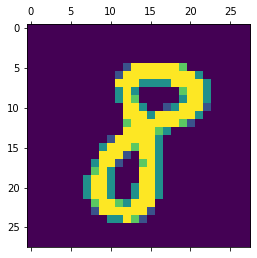

In [ ]:
plt.matshow(data_X[245])

In [ ]:
###############################################################
########### Graph Object ######################################
###############################################################

In [ ]:
class graph:

  def __init__(self, vertices = [] , edges = [], visited = [], bfs = []):
    self.v = vertices
    self.e = edges
    self.visit = visited
    self.bfs = bfs

  def set_visits(self):
    self.visit = []
    self.bfs = []
    for i in range(len(self.v)):
        self.visit.append(0)
        self.bfs.append(0)

  def adjacency(self):
    for i in range(len(self.v)):
      print("Vertex ", self.v[i] ," is connected to:")
      print(self.e[i])
  
  def add_vertex(self, v):
    self.v.append(v)
    self.e.append([])
    self.visit.append(0)
  
  def set_edges(self):
    for i in range(len(self.v)):
      self.e.append([])

  def add_edge(self, e):
    e1 = e[0]
    e2 = e[1]
    for i in range(len(self.v)):
      if self.v[i] == e2:
        self.e[i].append(e1)
    for i in range(len(self.v)):
      if self.v[i] == e1:
        self.e[i].append(e2)

  def if_edge(self, e):
    e1 = e[0]
    e2 = e[1]
    k = -1
    for i in range(len(self.v)):
      if self.v[i] == e1:
        break
    return e2 in self.e[i]

  def get_index(self , v):
    for i in range(len(self.v)):
      if self.v[i] == v:
        break
    return i
  
  def get_row(self , v):
    for i in range(len(self.v)):
      if self.v[i] == v:
        break
    row = []
    for j in range(len(self.v)):
      edge = self.v[j] in self.e[i]
      row.append(edge*1)
    return row

  def adjacency_matrix(self):
    adjacency_matrix = []
    for i in range(len(self.v)):
      adjacency_matrix.append(self.get_row(self.v[i]))
    return adjacency_matrix
  
  def update_visit(self , w):
    i = self.get_index(w)
    self.visit[i] = 1
  
  def get_visit(self,w):
    i = self.get_index(w)
    return self.visit[i]
  
  def get_unvisited(self, w):
    ret = []
    ind = self.get_index(w)
    for i in self.e[ind]:
      if self.get_visit(i) == 0:
        ret.append(i)
    return ret

  def update_bfs(self, w, t):
    i = self.get_index(w)
    self.bfs[i] = t

  def visit_left(self):
    return 0 in self.visit

  def bfs_val(self):
    return(max(self.bfs))

In [ ]:
def get_edges(graph, ord = False, v = 0):
  get_edges = []
  if ord == False:
    vertices = graph.v
    edges = graph.e
    for i in range(len(vertices)):
      vertex = vertices[i]
      while edges[i] != []:
        get_edges.append([vertex, edges[i][0]])
        edges[graph.get_index(edges[i][0])].remove(vertex)
        edges[i].pop(0)
    return get_edges
  if ord:
    vertices = graph.v
    order = graph.bfs_order(v)
    order_edge = []
    edges = graph.e
    for i in range(len(vertices)):
      vertex = vertices[i]
      while edges[i] != []:
        get_edges.append([vertex, edges[i][0]])
        order
        edges[graph.get_index(edges[i][0])].remove(vertex)
        edges[i].pop(0)
    return (get_edges,order_edge)


In [ ]:
def get_graph(vertices , edges):
  sample = graph(vertices)
  sample.set_edges()
  for i in edges:
    sample.add_edge(i)
  return sample

In [ ]:
################################################################
############## Ordering edges ##################################
################################################################

In [ ]:
def bfs_order(graph, v):
  time = 1
  graph.set_visits()
  graph.update_bfs(v, time)
  graph.update_visit(v)
  temp = graph.e[graph.get_index(v)]
  while graph.visit_left():
    time = time + 1
    temp2 = []
    for t in temp:
      if graph.get_visit(t) == 0:
        graph.update_bfs(t,time)
        graph.update_visit(t)
        temp2 = temp2 + graph.get_unvisited(t)
    if temp == []:
      temp2.append((graph.visit).index(0))
      time = time - 1
    temp = temp2

In [ ]:
def bfs_simplex_0(graph, v):
  s_0 = []
  graph.set_visits()
  bfs_order(graph, v)
  for i in graph.v:
    s_0.append(([i], graph.bfs[graph.get_index(i)]))
  return s_0   

In [ ]:
def bfs_simplex_1(graph, v):
  s_1 = []
  graph.set_visits()
  bfs_order(graph, v)
  for i in get_edges(graph):
    t = max(graph.bfs[graph.get_index(i[0])],graph.bfs[graph.get_index(i[1])])
    s_1.append((i,t))
  return s_1

In [ ]:
######################################################################
############ Obtaining skeleton of image #############################
######################################################################

In [ ]:
def get_skeleton(image):
    binary_image = image.astype(bool)
    skeleton = skeletonize(binary_image)
    skeleton = skeleton.astype(int)
    return skeleton

In [ ]:
def points(vertices):
  point = []
  [v0,v1] = vertices
  for i in range(np.shape(v0)[0]):
    point.append([v0[i],v1[i]])
  return list(point)

In [ ]:
def skeleton_points(image):
  sk = get_skeleton(image)
  vert_1 = np.where(sk == 1)
  return points(vert_1)

In [ ]:
def get_up_nghbrs(vertex, allpt):
  [x,y] = allpt[vertex]
  neighbours = [[x,y+1], [x+1,y], [x+1,y+1], [x+1, y-1]]
  ngbhr_vertices = []
  for i in neighbours:
    if i in allpt:
      ngbhr_vertices.append([vertex,allpt.index(i)])
  return ngbhr_vertices

In [ ]:
def get_up_nghbrs_nd(vertex, allpt):
  [x,y] = allpt[vertex]
  neighbours = [[x,y+1], [x+1,y]]
  ngbhr_vertices = []
  for i in neighbours:
    if i in allpt:
      ngbhr_vertices.append([vertex,allpt.index(i)])
  return ngbhr_vertices

In [ ]:
def graph_sk_edge(allpt):
  v = np.arange(np.shape(allpt)[0])
  e = []
  for i in v:
    e = e + get_up_nghbrs(i,allpt)
  return e

In [ ]:
def graph_sk_edge_r3c(allpt):
  v = np.arange(np.shape(allpt)[0])
  e = []
  for i in v:
    e = e + get_up_nghbrs_nd(i,allpt)
  return e

In [ ]:
def skeletongraph(image, show = -1):
  allpt = skeleton_points(image)
  v = np.arange(np.shape(allpt)[0])
  e = graph_sk_edge(allpt)
  if show == -1:
    g = graph(v,[])
    g.set_edges()
    for i in e:
      g.add_edge(i)
    return g
  if show == 1:
    g = nx.Graph()
    g.add_nodes_from(v)
    g.add_edges_from(e)
    return g

In [ ]:
################################################################
###### Constructing graph + Removing 3 cycles ##################
################################################################

In [ ]:
def add_edges_diag_r3c(g, allpt):
  for i in g.v:
    [x,y] = allpt[i]
    neighbours = [[x+1,y+1], [x+1, y-1]]
    for j in neighbours:
      if j in allpt:
        k = allpt.index(j)
        edges_k = g.e[k]
        edges_i = g.e[i]
        intersection = list(set(edges_k) & set(edges_i))
        if intersection == []:
          g.add_edge([i,k])
  return g

In [ ]:
def skeletongraphr3c(image, show = -1):
  allpt = skeleton_points(image)
  v = np.arange(np.shape(allpt)[0])
  e = graph_sk_edge_r3c(allpt)
  g = graph(v,[])
  g.set_edges()
  for i in e:
    g.add_edge(i)
  g_n = add_edges_diag_r3c(g,allpt)
  if show == -1:
    return g_n
  if show == 1:
    g_r = nx.Graph()
    g_r.add_nodes_from(v)
    g_r.add_edges_from(get_edges(g_n))
    return g_r

In [ ]:
####################################################################
############ Example ###############################################
####################################################################

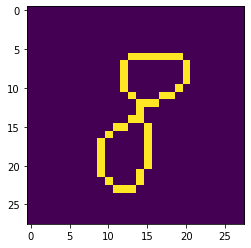

In [ ]:
#image = data_X[24955]
image = data_X[245]
plt.imshow(image)
g_0 = skeletongraph(image, 1)
g_1 = skeletongraph(image , -1)
g_3 = skeletongraphr3c(image, 1)
g_4 = skeletongraphr3c(image, -1)
plt.imshow(get_skeleton(image))

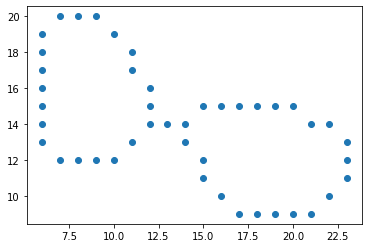

In [ ]:
#Skeletonising
sk = get_skeleton(image)
vo,v1 = np.where(sk== 1)
plt.scatter(vo,v1)

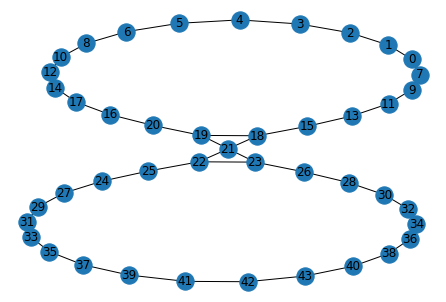

In [ ]:
#Shows graph with labelling of vertices
nx.draw_kamada_kawai(g_0, with_labels=True)

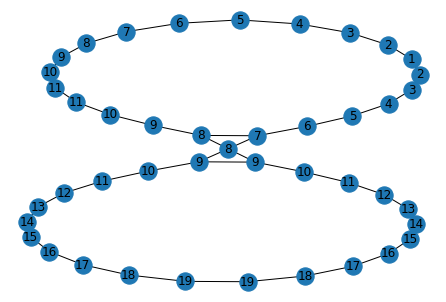

In [ ]:
#Shows graph with bfs stream labelling of vertices without excluding cycles of length 3
bfs_simplex_0(g_1,0)
labels={i:g_1.bfs[i] for i in range(0, np.shape(g_1.bfs)[0])}
nx.draw_kamada_kawai(g_0,labels = labels, with_labels=True)

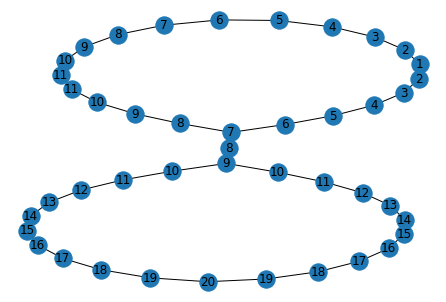

In [ ]:
#Shows graph with bfs stream labelling of vertices excluding cycles of length 3
bfs_simplex_0(g_4,0)
labels={i:g_4.bfs[i] for i in range(0, np.shape(g_4.bfs)[0])}
nx.draw_kamada_kawai(g_3,labels = labels, with_labels=True)

In [ ]:
sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),0)
sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),0)
sim = sim_0 + sim_1
print(sim)

[([0], 1), ([1], 2), ([2], 3), ([3], 4), ([4], 5), ([5], 6), ([6], 7), ([7], 2), ([8], 8), ([9], 3), ([10], 9), ([11], 4), ([12], 10), ([13], 5), ([14], 11), ([15], 6), ([16], 10), ([17], 11), ([18], 7), ([19], 8), ([20], 9), ([21], 8), ([22], 10), ([23], 9), ([24], 12), ([25], 11), ([26], 10), ([27], 13), ([28], 11), ([29], 14), ([30], 12), ([31], 15), ([32], 13), ([33], 16), ([34], 14), ([35], 17), ([36], 15), ([37], 18), ([38], 16), ([39], 19), ([40], 17), ([41], 20), ([42], 19), ([43], 18), ([0, 1], 2), ([0, 7], 2), ([1, 2], 3), ([2, 3], 4), ([3, 4], 5), ([4, 5], 6), ([5, 6], 7), ([6, 8], 8), ([7, 9], 3), ([8, 10], 9), ([9, 11], 4), ([10, 12], 10), ([11, 13], 5), ([12, 14], 11), ([13, 15], 6), ([14, 17], 11), ([15, 18], 7), ([16, 17], 11), ([16, 20], 10), ([18, 19], 8), ([18, 21], 8), ([19, 20], 9), ([21, 23], 9), ([22, 23], 10), ([22, 25], 11), ([23, 26], 10), ([24, 25], 12), ([24, 27], 13), ([26, 28], 11), ([27, 29], 14), ([28, 30], 12), ([29, 31], 15), ([30, 32], 13), ([31, 33],

In [ ]:
f = ds.Filtration()
for vertices, time in sim:
  f.append(ds.Simplex(vertices, time))

In [ ]:
f.sort()
m = ds.homology_persistence(f)

In [ ]:
#Prints Persistence Diagram
diagrams = ds.init_diagrams(m,f)
print(diagrams)
for i,dgms in enumerate(diagrams):
  for pt in dgms:
    print(i , pt.birth, pt.death)

[Diagram with 1 points, Diagram with 2 points]
0 1.0 inf
1 11.0 inf
1 20.0 inf


In [ ]:
#Prints simplex stream
for s in f:
  print(s)

In [ ]:
data_dim_0 = []
data_gtda_0 = []
data_dim_1 = []
data_gtda_1 = []
sk = get_skeleton(image)
#cutoff value is total number of vertices in the graph
cutoff = float(np.shape(np.where(sk==1))[1])+1
for i,dgms in enumerate(diagrams):
  for pt in dgms:
    if i == 0:
      if pt.death == float('inf'):
        data_dim_0.append([pt.birth, cutoff])
        data_gtda_0.append([pt.birth, cutoff, 0])
      else:
        data_dim_0.append([pt.birth, pt.death])
        data_gtda_0.append([pt.birth, pt.death, 0])
    if i == 1:
      if pt.death == float('inf'):
        data_dim_1.append([pt.birth, cutoff])
        data_gtda_1.append([pt.birth, cutoff, 1])
      else:
        data_dim_1.append([pt.birth, pt.death])
        data_gtda_1.append([pt.birth, pt.death, 1])

In [ ]:
############ Statistical Summary of array ##############################
def stat_summary(list1):
  lis = np.array(list1)
  min = lis.min()
  max = lis.max()
  median = np.median(lis)
  mean = np.mean(lis)
  return [min, max, median, mean]

In [ ]:
############## Summary of Diagrams ######################################
def length_summary_1(diag):
  lengths = []
  if diag == []:
    return (0,0,0)
  for i in diag:
   lengths.append(i[1] - i[0])
  return (min(lengths),max(lengths), sum(lengths)/len(lengths))

def length_summary_2(diag):
  lengths = []
  if diag == []:
    return (0,0,0)
  for i in diag:
   lengths.append(i[0]*(i[1] - i[0]))
  return (min(lengths),max(lengths), sum(lengths)/len(lengths))

def length_summary_3(diag):
  a = 0
  b = 0
  lengths = []
  if diag == []:
    return (0,0,0)
  for i in diag:
    a = a + i[0]*(i[1] - i[0])
    b = b + (i[0]**2)*(i[1] - i[0])**4
    lengths.append(i[1] - i[0])
  return (a, b, sum(lengths)/len(lengths))

def persistence_statistics(diag):
  lengths = []
  mid = []
  normlife = []
  if diag == []:
    return [0,0,0,0,0,0,0,0,0]
  for i in diag:
    lengths.append(i[1]-i[0])
    mid.append((i[0]+i[1])/2.0)
  total_persistence = sum(lengths)
  for i in range(0,len(diag)):
    normlife = lengths[i]/(np.array(lengths).max())
  return [total_persistence] + stat_summary(mid) + stat_summary(normlife)

In [ ]:
def vect_diag(diag):
  dg_2 = np.array([diag])
  ret = []
  if diag == []:
    return [0,0,0,-1,0]
  ret.append(gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(dg_2)[0][0])
  ret.append(gtda.diagrams.Amplitude(metric_params={"n_layers":4} , metric ='landscape', order = None).fit_transform(dg_2)[0][0])
  ret.append(gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(dg_2)[0][0])
  ret.append(gtda.diagrams.PersistenceEntropy().fit_transform(dg_2)[0][0])
  ret.append(gtda.diagrams.Amplitude(metric = 'bottleneck', order = None).fit_transform(dg_2)[0][0])
  return ret

In [ ]:
#######################################################
######### Rough #######################################
#######################################################

In [ ]:
dg_2 = np.array([data_gtda_1])
print(gtda.diagrams.Amplitude(metric = 'betti', order = None).fit_transform(dg_2)[0][0])
print(gtda.diagrams.Amplitude(metric_params={"n_layers":4} , metric ='landscape', order = None).fit_transform(dg_2)[0][0])
print(gtda.diagrams.Amplitude(metric = 'wasserstein', order = None).fit_transform(dg_2)[0][0])
print(gtda.diagrams.PersistenceEntropy().fit_transform(dg_2)[0][0])
print(gtda.diagrams.Amplitude(metric = 'bottleneck', order = None).fit_transform(dg_2)[0][0])

10.40104889815533
67.65255838436846
21.10094784600919
0.9831491282282877
17.0


In [ ]:
vect_diag(data_gtda_1)

[10.40104889815533,
 67.65255838436846,
 21.10094784600919,
 0.9831491282282877,
 17.0]

In [ ]:
#######################################################
######## Obtaining vectors with 4 vertex choices ######
#######################################################

In [ ]:
def length_summary(image, cases = 0):
  sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),0)
  sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),0)
  sim = sim_0 + sim_1
  f = ds.Filtration()
  for vertices, time in sim:
    f.append(ds.Simplex(vertices, time))
  f.sort()
  m = ds.homology_persistence(f)
  diagrams = ds.init_diagrams(m,f)
  data_dim_0 = []
  data_dim_1 = []
  sk = get_skeleton(image)
  #cutoff value is total number of vertices in the graph
  cutoff = float(np.shape(np.where(sk==1))[1])+1
  for i,dgms in enumerate(diagrams):
    for pt in dgms:
      if i == 0:
        if pt.death == float('inf'):
          data_dim_0.append([pt.birth, cutoff])
        else:
          data_dim_0.append([pt.birth, pt.death])
      if i == 1:
        if pt.death == float('inf'):
          data_dim_1.append([pt.birth, cutoff])
        else:
          data_dim_1.append([pt.birth, pt.death])
  return length_summary_1(data_dim_0) + length_summary_1(data_dim_1)

In [ ]:
def pers_vect_summary(image):
  sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),0)
  sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),0)
  sim = sim_0 + sim_1
  f = ds.Filtration()
  for vertices, time in sim:
    f.append(ds.Simplex(vertices, time))
  f.sort()
  m = ds.homology_persistence(f)
  diagrams = ds.init_diagrams(m,f)
  data_dim_0 = []
  data_dim_1 = []
  sk = get_skeleton(image)
  #cutoff value is total number of vertices in the graph
  cutoff = float(np.shape(np.where(sk==1))[1])+1
  for i,dgms in enumerate(diagrams):
    for pt in dgms:
      if i == 0:
        if pt.death == float('inf'):
          data_dim_0.append([pt.birth, cutoff,0])
        else:
          data_dim_0.append([pt.birth, pt.death,0])
      if i == 1:
        if pt.death == float('inf'):
          data_dim_1.append([pt.birth, cutoff,1])
        else:
          data_dim_1.append([pt.birth, pt.death,1])
  return list(vect_diag(data_dim_0)) + list(vect_diag(data_dim_1))

In [ ]:
def get_vectors(data_X):
  data_1 = []
  data_2 = []
  data_3 = []
  data_4 = []
  sh = np.shape(data_X)[0]
  for i in range(0, sh):
    img =  data_X[i]
    data_1.append(pers_vect_summary(img))
    img = np.rot90(data_X[i])
    data_2.append(pers_vect_summary(img))
    img = np.rot90(np.rot90(data_X[i]))
    data_3.append(pers_vect_summary(img))
    img = np.rot90(np.rot90(np.rot90(data_X[i])))
    data_4.append(pers_vect_summary(img))
  return np.concatenate((np.array(data_1),np.array(data_2),np.array(data_3),np.array(data_4)), axis = 1)

In [ ]:
bfs_vect = get_vectors(data_X)
pd.DataFrame(bfs_vect).to_csv('bfs_vect.csv')
!zip bfs.zip *.csv
!mv bfs.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
#####################################################################
########### Translating and Rotating ################################
#####################################################################

In [ ]:
#Translating and Rotating
def translated_data(images, x = 6, y = 3):
    translated_data = np.zeros((np.shape(images)[0],28,28))
    M = np.float32([[1,0,x],[0,1,y]])
    for i in range(0,np.shape(images)[0]):
        translated_data[i] =  cv.warpAffine(images[i],M,(28,28))
    return translated_data

In [ ]:
def rotate_data(images, angle = 30):
    rotated_data = np.zeros((np.shape(images)[0],28,28))
    M = cv.getRotationMatrix2D((14,14),angle,1)
    for i in range(0,np.shape(images)[0]):
        rotated_data[i] =  cv.warpAffine(images[i],M,(28,28))
    return rotated_data

In [ ]:
translated_1 = get_vectors(translated_data(test))
translated_2 = get_vectors(translated_data(test, x = -6))
translated_3 = get_vectors(translated_data(test, y = -3))
translated_4 = get_vectors(translated_data(test, x = -6, y = -3))

In [ ]:
translated_5 = get_vectors(translated_data(test, x = 2, y = 1))
translated_6 = get_vectors(translated_data(test, x = 2, y = -1))
translated_7 = get_vectors(translated_data(test, x = -3, y =2))
translated_8 = get_vectors(translated_data(test, x = -4, y = -2))

In [ ]:
pd.DataFrame(translated_1).to_csv('translated_1.csv')
pd.DataFrame(translated_2).to_csv('translated_2.csv')
pd.DataFrame(translated_3).to_csv('translated_3.csv')
pd.DataFrame(translated_4).to_csv('translated_4.csv')
!zip translated_pers_stat_summary.zip *.csv
!mv translated_pers_stat_summary.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
pd.DataFrame(translated_5).to_csv('translated_5.csv')
pd.DataFrame(translated_6).to_csv('translated_6.csv')
pd.DataFrame(translated_7).to_csv('translated_7.csv')
pd.DataFrame(translated_8).to_csv('translated_8.csv')
!zip translated_pers_stat_summary_2.zip *.csv
!mv translated_pers_stat_summary_2.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
angle =[10,20,30,-10,-20,-30]
for i in range(0,6):
    rotateddata = get_vectors(rotate_data(test, angle = angle[i]))
    pd.DataFrame(rotateddata).to_csv("rotated_"+str(i)+".csv")
!zip rotated_pers_stat_summary_2.zip *.csv
!mv rotated_pers_stat_summary_2.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
###################################################################
#################Accuracy using Random Forest Classifier###########
##################################################################

In [ ]:
!unzip "/content/drive/My Drive/BFS_Simplex/bfs.zip"

Archive:  /content/drive/My Drive/BFS_Simplex/bfs.zip
  inflating: bfs_vect.csv            


In [ ]:
bfs_vect = pd.read_csv("bfs_vect.csv")

In [ ]:
#Without Translation
data = np.array(bfs_vect)[:,1:]
data_train = data[:60000,:]
data_test = data[60000:,:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, random_state=31415)
clf.fit(data_train, digit_train)
digit_pred=clf.predict(data_test[:3000])
print("Accuracy:",metrics.accuracy_score(digit_test[:3000], digit_pred))

Accuracy: 0.6203333333333333


In [ ]:
#For translated data
!unzip "/content/drive/My Drive/BFS_Simplex/translated_pers_stat_summary_2.zip"

In [ ]:
for i in range(1,9):
  test_tr = np.array(pd.read_csv("translated_"+str(i)+".csv"))[:,1:]
  digit_pred=clf.predict(test_tr)
  print("Accuracy for translated ",i," :",metrics.accuracy_score(digit_test, digit_pred)*100)

Accuracy for translated  1  : 61.31999999999999
Accuracy for translated  2  : 62.46000000000001
Accuracy for translated  3  : 61.31999999999999
Accuracy for translated  4  : 62.96000000000001
Accuracy for translated  5  : 62.79
Accuracy for translated  6  : 62.660000000000004
Accuracy for translated  7  : 62.93
Accuracy for translated  8  : 62.72


In [ ]:
for i in range(1,9):
  test_tr = np.array(pd.read_csv("translated_"+str(i)+".csv"))[:3000,1:]
  digit_pred=clf.predict(test_tr)
  print("Accuracy for translated ",i," :",metrics.accuracy_score(digit_test[:3000], digit_pred)*100)

Accuracy for translated  1  : 59.96666666666667
Accuracy for translated  2  : 61.83333333333333
Accuracy for translated  3  : 60.03333333333334
Accuracy for translated  4  : 61.83333333333333
Accuracy for translated  5  : 62.0
Accuracy for translated  6  : 61.9
Accuracy for translated  7  : 62.1
Accuracy for translated  8  : 61.93333333333333


In [ ]:
#For rotated data: 
!unzip "/content/drive/My Drive/BFS_Simplex/rotated_pers_stat_summary_2.zip"

In [ ]:
for i in range(0,6):
  test_tr = np.array(pd.read_csv("rotated_"+str(i)+".csv"))[:,1:]
  digit_pred=clf.predict(test_tr)
  print("Accuracy for rotated ",i+1," :",metrics.accuracy_score(digit_test, digit_pred)*100)

Accuracy for rotated  1  : 51.28
Accuracy for rotated  2  : 46.96
Accuracy for rotated  3  : 46.77
Accuracy for rotated  4  : 52.03
Accuracy for rotated  5  : 49.730000000000004
Accuracy for rotated  6  : 47.77


In [ ]:
for i in range(0,6):
  test_tr = np.array(pd.read_csv("rotated_"+str(i)+".csv"))[:3000,1:]
  digit_pred=clf.predict(test_tr)
  print("Accuracy for rotated ",i+1," :",metrics.accuracy_score(digit_test[:3000], digit_pred)*100)

Accuracy for rotated  1  : 52.96666666666666
Accuracy for rotated  2  : 48.96666666666666
Accuracy for rotated  3  : 49.333333333333336
Accuracy for rotated  4  : 53.6
Accuracy for rotated  5  : 50.63333333333333
Accuracy for rotated  6  : 49.46666666666666


In [ ]:
##############################################################
########Random selection of  points method ###################
##############################################################

In [ ]:
def pers_stat_summary_rand(image, v):
  sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),v)
  sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),v)
  sim = sim_0 + sim_1
  f = ds.Filtration()
  for vertices, time in sim:
    f.append(ds.Simplex(vertices, time))
  f.sort()
  m = ds.homology_persistence(f)
  diagrams = ds.init_diagrams(m,f)
  data_dim_0 = []
  data_dim_1 = []
  sk = get_skeleton(image)
  #cutoff value is total number of vertices in the graph
  cutoff = float(np.shape(np.where(sk==1))[1])+1
  for i,dgms in enumerate(diagrams):
    for pt in dgms:
      if i == 0:
        if pt.death == float('inf'):
          data_dim_0.append([pt.birth, cutoff,0])
        else:
          data_dim_0.append([pt.birth, pt.death,0])
      if i == 1:
        if pt.death == float('inf'):
          data_dim_1.append([pt.birth, cutoff,1])
        else:
          data_dim_1.append([pt.birth, pt.death,1])
  return list(vect_diag(data_dim_0)) + list(vect_diag(data_dim_1))

In [ ]:
rand_data = []
for i in range(0,70000):
  img = data_X[i]
  random.seed(i)
  sk = get_skeleton(img)
  cutoff = float(np.shape(np.where(sk==1))[1])
  samp = random.sample(list(np.arange(0,cutoff)), 4)
  k = []
  for j in range(0,4):
    k = k + pers_stat_summary_rand(img, samp[j])
  rand_data.append(k)

In [ ]:
pd.DataFrame(rand_data).to_csv("rand_bfs.csv")
!zip rand_bfs.zip rand_bfs.csv
!mv rand_bfs.zip "/content/drive/MyDrive/BFS_Simplex"

In [ ]:
rand_data_train = np.array(rand_data)[:60000,:]
rand_data_test = np.array(rand_data)[60000:,:]

clf_rand = RandomForestClassifier(n_estimators = 100, random_state=314)
clf_rand.fit(rand_data_train, digit_train)
digit_pred=clf_rand.predict(rand_data_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(digit_test, digit_pred))

Accuracy: 0.5389


In [ ]:
########################################################
#### Average over all points ###########################
########################################################

In [ ]:
def new_avg(l):
  ret = []
  for i in range(0, np.shape(l)[1]):
    t = l[:,i]
    ret.append(np.mean(t))
  return ret

In [ ]:
data = []
for i in range(0,70000):
  img = data_X[i]
  #random.seed(i)
  sk = get_skeleton(img)
  cutoff = float(np.shape(np.where(sk==1))[1])
  #samp = random.sample(list(np.arange(0,cutoff)), 4)
  samp = np.arange(0,cutoff)
  k = []
  for j in range(0,np.shape(samp)[0]):
    #k = k + pers_stat_summary_rand(img, samp[j])
    k.append(pers_stat_summary_rand(img, samp[j]))
  l = np.array(k)
  data.append(new_avg(l))

In [ ]:
pd.DataFrame(data).to_csv("avg_bfs.csv")
!zip avg_bfs.zip avg_bfs.csv
!mv avg_bfs.zip "/content/drive/MyDrive/BFS_Simplex"

In [ ]:
!unzip "/content/drive/MyDrive/BFS_Simplex/avg_bfs.zip"
avg_vect = pd.read_csv("avg_bfs.csv")
data = np.array(avg_vect)[:,1:]
data_train = data[:60000,:]
data_test = data[60000:,:]

Archive:  /content/drive/MyDrive/BFS_Simplex/avg_bfs.zip
replace avg_bfs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
clf_1 = RandomForestClassifier(n_estimators = 100, random_state=31415)
clf_1.fit(data_train, digit_train)
digit_pred=clf_1.predict(data_test[:3000])
print("Accuracy:",metrics.accuracy_score(digit_test[:3000], digit_pred)*100)

Accuracy: 55.400000000000006


In [ ]:
###### Rotating and Translating data ##########################

In [ ]:
def get_avg_bfs(images):
  data = []
  for i in range(0,np.shape(images)[0]):
    img = images[i]
    #random.seed(i)
    sk = get_skeleton(img)
    cutoff = float(np.shape(np.where(sk==1))[1])
    #samp = random.sample(list(np.arange(0,cutoff)), 4)
    samp = np.arange(0,cutoff)
    k = []
    for j in range(0,np.shape(samp)[0]):
      #k = k + pers_stat_summary_rand(img, samp[j])
      k.append(pers_stat_summary_rand(img, samp[j]))
    l = np.array(k)
    data.append(new_avg(l))
  return data

In [ ]:
test_1 = test[:3000,:]
translated_1 = get_avg_bfs(translated_data(test_1))
pd.DataFrame(translated_1).to_csv('translated_1.csv')
translated_2 = get_avg_bfs(translated_data(test_1, x = -6))
pd.DataFrame(translated_2).to_csv('translated_2.csv')
translated_3 = get_avg_bfs(translated_data(test_1, y = -3))
pd.DataFrame(translated_3).to_csv('translated_3.csv')
translated_4 = get_avg_bfs(translated_data(test_1, x = -6, y = -3))
pd.DataFrame(translated_4).to_csv('translated_4.csv')
!zip translated_avg_bfs_summary.zip *.csv
!mv translated_avg_bfs_summary.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
test_1 = test[:3000,:]
translated_5 = get_avg_bfs(translated_data(test_1, x = 2, y = 1))
pd.DataFrame(translated_5).to_csv('translated_5.csv')
translated_6 = get_avg_bfs(translated_data(test_1, x = 2, y = -1))
pd.DataFrame(translated_6).to_csv('translated_6.csv')
translated_7 = get_avg_bfs(translated_data(test_1, x = -3, y =2))
pd.DataFrame(translated_7).to_csv('translated_7.csv')
translated_8 = get_avg_bfs(translated_data(test_1, x = -4, y = -2))
pd.DataFrame(translated_8).to_csv('translated_8.csv')
!zip translated_avg_bfs_summary_2.zip *.csv
!mv translated_avg_bfs_summary_2.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
angle =[10,20,30,-10,-20,-30]
for i in range(0,6):
    rotateddata = get_avg_bfs(rotate_data(test_1, angle = angle[i]))
    pd.DataFrame(rotateddata).to_csv("rotated_"+str(i)+".csv")

!zip rotated_avg_bfs_summary_2.zip *.csv
!mv rotated_avg_bfs_summary_2.zip "/content/drive/My Drive/BFS_Simplex"

In [ ]:
!unzip "/content/drive/My Drive/BFS_Simplex/rotated_avg_bfs_summary_2.zip"

In [ ]:
for i in range(0,6):
  test_transformed = np.array(pd.read_csv("rotated_"+str(i)+".csv"))[:,1:]
  digit_pred= clf_1.predict(test_transformed)
  print(i," Accuracy :",metrics.accuracy_score(digit_test[:3000], digit_pred)*100)

0  Accuracy : 46.0
1  Accuracy : 44.666666666666664
2  Accuracy : 46.43333333333333
3  Accuracy : 47.3
4  Accuracy : 46.733333333333334
5  Accuracy : 47.43333333333333


In [ ]:
for i in range(1,5):
  test_transformed = np.array(pd.read_csv("translated_"+str(i)+".csv"))[:,1:]
  digit_pred= clf_1.predict(test_transformed)
  print(i," Accuracy :",metrics.accuracy_score(digit_test[:3000], digit_pred)*100)

1  Accuracy : 52.900000000000006
2  Accuracy : 55.300000000000004
3  Accuracy : 52.83333333333333
4  Accuracy : 55.43333333333334


In [ ]:
for i in range(5,9):
  test_transformed = np.array(pd.read_csv("translated_"+str(i)+".csv"))[:,1:]
  digit_pred= clf_1.predict(test_transformed)
  print(i," Accuracy :",metrics.accuracy_score(digit_test[:3000], digit_pred)*100)

5  Accuracy : 55.50000000000001
6  Accuracy : 55.46666666666666
7  Accuracy : 55.50000000000001
8  Accuracy : 55.50000000000001
